# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [496]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from datetime import datetime

In [497]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [498]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="




## Generate Cities List

In [499]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [445]:
print( cities)

['salinas', 'mataura', 'voh', 'upernavik', 'cape town', 'busselton', 'poronaysk', 'east london', 'mys shmidta', 'sao jose da coroa grande', 'bredasdorp', 'isangel', 'vaini', 'dacice', 'bima', 'hobart', 'ushuaia', 'atuona', 'sitka', 'rungata', 'bereda', 'toshkivka', 'vaitupu', 'abu kamal', 'grindavik', 'carnarvon', 'albany', 'chikoy', 'khatanga', 'barrow', 'chuy', 'hamilton', 'iquique', 'rikitea', 'ribeira grande', 'punta arenas', 'bethel', 'la orilla', 'atambua', 'tezu', 'jamestown', 'illoqqortoormiut', 'bengkulu', 'ornskoldsvik', 'hilo', 'pevek', 'den helder', 'san cristobal', 'waitati', 'castro', 'grand falls', 'pangkalanbuun', 'taolanaro', 'taganak', 'shingu', 'georgetown', 'san francisco menendez', 'beaufort', 'taoudenni', 'adrar', 'qaanaaq', 'killam', 'saskylakh', 'xichang', 'hermanus', 'tabiauea', 'yulara', 'saldanha', 'el castillo', 'hithadhoo', 'hobro', 'batesville', 'mahebourg', 'prattville', 'gondanglegi', 'chicama', 'hovd', 'roebourne', 'wanaka', 'clyde river', 'bluff', 'cor

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [447]:
# set up lists to hold reponse info

weather_data = pd.DataFrame(columns = ['city','cloudiness','country','date','humidity','latitude','max temp','wind speed'])
                                      
                                     
# Loop through the list of cities and perform a request for data on each
for row,city in enumerate(cities):
    response = requests.get(query_url + city).json()
    if response["cod"] != "404":
        weather_data.set_value(row,"city",response['name']),
        weather_data.set_value(row,"cloudiness",response['clouds']['all'])
        weather_data.set_value(row,"country",response['sys']['country'])
        weather_data.set_value(row,"date",response['dt']) 
        weather_data.set_value(row,"humidity",response['main']['humidity'])
        weather_data.set_value(row,"latitude",response['coord']['lat'])
        weather_data.set_value(row,"longitude",response['coord']['lon'])
        weather_data.set_value(row,"max temp",response['main']['temp_max'])
        weather_data.set_value(row,"wind speed",response['wind']['speed'])
        
weather_data



C:\Users\Froggy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Froggy\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Froggy\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\Froggy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\Froggy\Anaconda3\lib\site-packages\ipykernel_launcher.py:

,city,cloudiness,country,date,humidity,latitude,max temp,wind speed,longitude
0,Salinas,1,US,1547100000,86,36.67,55.04,3.36,-121.66
1,Mataura,56,NZ,1547100548,47,-46.19,66.44,21.27,168.86
2,Voh,24,NC,1547100548,98,-20.95,77.51,22.06,164.69
3,Upernavik,64,GL,1547100548,99,72.79,-0.07,20.83,-56.15
4,Cape Town,75,ZA,1547096400,72,-33.93,64.4,5.82,18.42
5,Busselton,0,AU,1547100549,94,-33.64,69.86,20.71,115.35
6,Poronaysk,20,RU,1547100551,67,49.22,11.45,9.98,143.10
7,East London,20,ZA,1547096400,73,-33.02,73.4,18.34,27.91
9,Sao Jose da Coroa Grande,80,BR,1547100555,100,-8.9,74.5,4.38,-35.15
10,Bredasdorp,80,ZA,1547096400,68,-34.53,64.4,9.17,20.04


In [505]:
# copy file to csv

export_output = weather_data.to_csv('C:/Users/Froggy\Desktop/DATASCIENCE/JSON/PythonAPI Homework/Instructions/starter_code/weather_data.csv.csv')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
Output File (CSV)
output_data_file = "output_data/cities.csv"

In [448]:
# weather_df.to_csv('city_weather_data.csv', index_label='city_id')

weather_data.count()

city          535
cloudiness    535
country       535
date          535
humidity      535
latitude      535
max temp      535
wind speed    535
longitude     535
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [512]:
date_plot = str(weather_data.iloc[0,3])
date_plot = datetime.fromtimestamp(int(date_plot)).strftime('%m-%d-%Y')


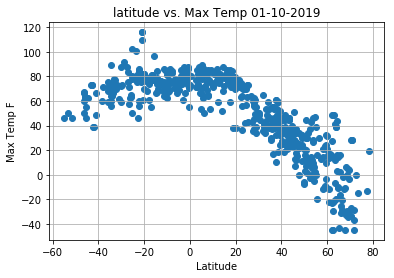

In [513]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["max temp"], marker="o")

# Incorporate the other graph properties
plt.title("latitude vs. Max Temp" + " " + date_plot)
plt.ylabel("Max Temp F")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("latitude vs. Max Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

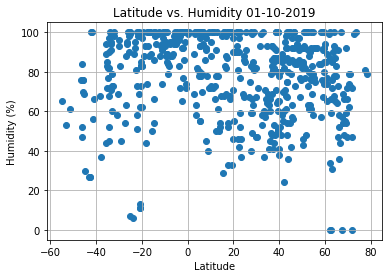

In [517]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity" + " " + date_plot)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity Plot.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

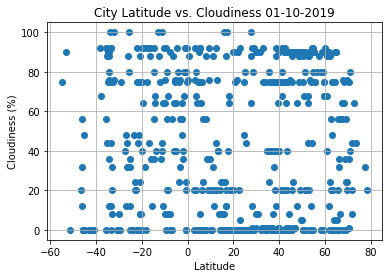

In [518]:
# Build a scatter plot for atitude vs. Cloudiness
plt.scatter(weather_data["latitude"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness" + " " + date_plot)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

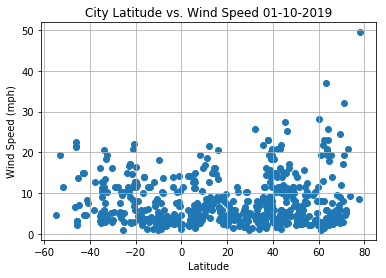

In [520]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data["latitude"], weather_data["wind speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed" + " " + date_plot)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind Speed.png")

# Show plot
plt.show()